# **Week 2:** Data Preparation
#### June 27, 2023
---------------- 

This notebook is an exercise in data cleaning and wrangling using a Netflix titles (`netflix_titles.txt`). Our goal is to clean, wrangle, and standardize the dataset prior to conducting visualization.

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows)

Install necessary Python packages: Pandas, Matplotlib, Seaborn

In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the `netflix_titles.csv` CSV file into a Pandas Dataframe, and call it `df`. Output the top 5 rows of the dataframe. You can also open this file in Excel to better visualize the data.

In [520]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,united Sttes,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",S Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,television,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


What are the column names in the dataframe?

In [521]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Cleaning

Are there any duplicate rows in the dataframe? 

In [522]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
11,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


There are two duplicate rows for Unique IDs `s10` and `s11`. We need to drop them from the dataframe.

In [523]:
df = df.drop_duplicates()

Run the same code from above to verify that we dropped all duplicate rows.

In [524]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Now we need to deal with missing values. Which columns have missing or NULL values in them?

In [525]:
df.columns[df.isna().any()].tolist()

['director', 'cast', 'country']

Find the number of missing values in each column.

In [526]:
df.isnull().sum()

show_id          0
type             0
title            0
director        63
cast            20
country         64
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Let's drop each row with a missing or NULL value because they are not useful for our analysis. There are other ways to deal with missing values (delete, keep, impute, etc.), but we will just delete them for this exercise.

In [527]:
df = df.dropna(how='any', axis=0)

Run the same code from above to verify that we dropped all rows with missing values.

In [528]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Let's make sure the data is "standardized" or "normalized." Output the count of each unique value for the column `type.` Do you see anything weird?

In [509]:
df.groupby('type').size()

type
Cinema         1
Movees         1
Movie         90
TV Show        1
television     1
dtype: int64

`Movees`, `television`, and `cinema` need to be standardized. They are likely mistakes in data entry. Let's replace any cells with these values to match the types for `TV Show` and `Movie`.

In [510]:
df['type'] = df['type'].str.replace('Cinema', 'Movie')
df['type'] = df['type'].str.replace('Movees', 'Movie')
df['type'] = df['type'].str.replace('television', 'TV Show')

Run the same code from above to verify that we have standardized all type names.

In [511]:
df.groupby('type').size()

type
Movie      92
TV Show     2
dtype: int64

Let's visualize the `type` column. In our dataset, which type of Netflix program is the most frequent?

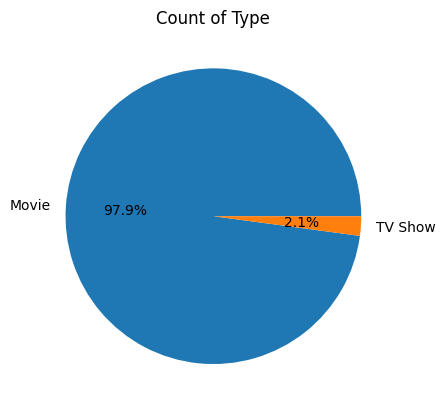

In [512]:
df.groupby('type').size().plot.pie(autopct='%.1f%%')
plt.title('Count of Type')
plt.ylabel('')
plt.show()

PRACTICE: Can you standardize the `country` column in the same way we standardized `type`?

In [513]:
df.groupby('country').size()

country
Argentina                           1
Australia                           1
Canada                              1
China                               2
France                              1
Germany                             3
Hong Kong                           1
India                               8
Indiaaa                             1
Italy                               1
Japan                              11
Japanese                            1
Nigeria                             3
South Africa                        2
Spain                               1
US                                  4
United Kingdom                      7
United States                      40
United States, China, Hong Kong     1
india                               1
united Sttes                        3
dtype: int64

After cleaning up the `country` column, let's visualize the Top 10 countries in our dataset by the number of titles. Which country has the most Netflix programs in our dataset?

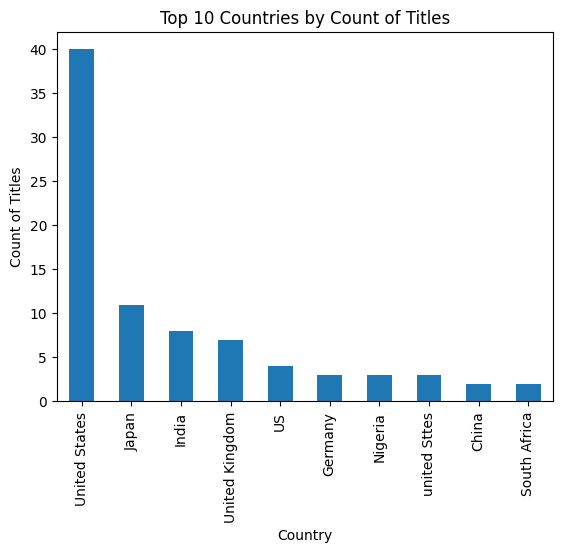

In [514]:
country_counts = df.groupby('country')['title'].nunique().nlargest(10)

country_counts.plot.bar()
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.title('Top 10 Countries by Count of Titles')
plt.show()

## Data Wrangling

Let's check for outliers in our numeric column `release_year`. Similar to Week 1, create a box plot of the years programs in our dataset were released. Are there any outliers? 

<Axes: ylabel='release_year'>

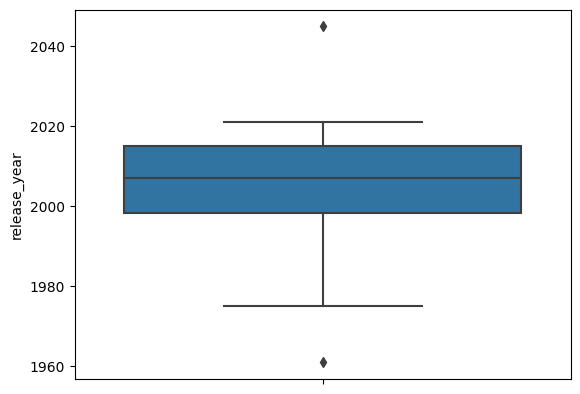

In [515]:
sns.boxplot(data=df, y='release_year')

Looks like there are two outliers. What years are they?

In [516]:
max_year = max(df['release_year'])
min_year = min(df['release_year'])
min_year, max_year

(1961, 2045)

Uh oh. Someone must've made a mistake in data entry because 2045 hasn't happened yet. Can you drop this row from the dataframe?

Even though 1961 is an outlier, let's keep it in the dataframe for analysis because it is a valid release year. Later, we might want to remove it for better modeling predictions of programs between the 1970s and 2020s.